In [0]:
from skimage import data, segmentation, filters, color
from skimage.future import graph
import matplotlib.pyplot as plt

In [0]:
def weight_boundry(graph, src, dst, n):
  default ={'weight' : 0.0 , 'count' : 0}
  
  count_src = graph[src].get(n, default)['count']
  count_dst = graph[dst].get(n, default)['count']
  
  weight_src = graph[src].get(n, default)['weight']
  weight_dst = graph[dst].get(n, default)['weight']
  
  count = count_src + count_dst
  
  return{
      'count' : count,
      'weight': (count_src * weight_src + count_dst * weight_dst) /count
      }



In [0]:
def merge_boundry(graph, src, dst):
  pass

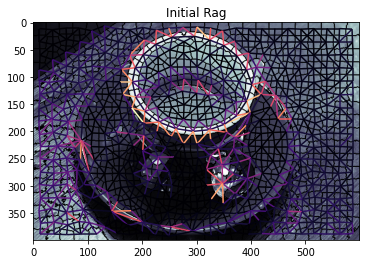

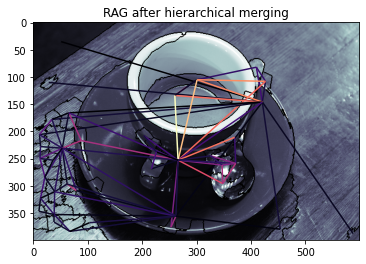

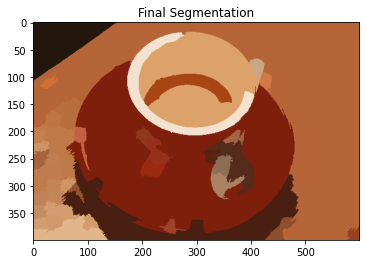

In [7]:
img = data.coffee()
edges = filters.sobel(color.rgb2gray(img))
lbls = segmentation.slic(img, compactness = 30, n_segments= 400)
g = graph.rag_boundary(lbls, edges)

graph.show_rag(lbls, g, img)
plt.title("Initial Rag")

lbls2 = graph.merge_hierarchical(lbls, g, thresh = 0.08, rag_copy = False, in_place_merge= True, merge_func= merge_boundry, weight_func= weight_boundry)

graph.show_rag(lbls, g, img)
plt.title("RAG after hierarchical merging")

plt.figure()
out = color.label2rgb(lbls2, img, kind= 'avg')

plt.imshow(out)
plt.title("Final Segmentation")

plt.show()
